In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform, norm, binom, expon
import matplotlib.pyplot as plt
import random
%matplotlib inline
# from statsmodels.nonparametric.smoothers_lowess import lowess
# import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

### IDs:

ID #1: Omri Newman 806646



## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Overall pearson correlation =  (-0.9931014863539507, 2.4031539375326063e-46)
Overall pearson correlation < -0.9 =  True
Pearson correlation excluding last element =  (1.0, 0.0)
Pearson correlation excluding last element > -0.2 =  True
      x     y
0   1.0   1.0
1   1.0   1.0
2   1.0   1.0
3   1.0   1.0
4   1.0   1.0
5   1.0   1.0
6   1.0   1.0
7   1.0   1.0
8   1.0   1.0
9   1.0   1.0
10  1.0   1.0
11  1.0   1.0
12  1.0   1.0
13  1.0   1.0
14  1.0   1.0
15  1.0   1.0
16  1.0   1.0
17  1.0   1.0
18  1.0   1.0
19  1.0   1.0
20  1.0   1.0
21  1.0   1.0
22  1.0   1.0
23  1.0   1.0
24  1.0   1.0
25  1.0   1.0
26  1.0   1.0
27  1.0   1.0
28  1.0   1.0
29  1.0   1.0
30  1.0   1.0
31  1.0   1.0
32  1.0   1.0
33  1.0   1.0
34  1.0   1.0
35  1.0   1.0
36  1.0   1.0
37  1.0   1.0
38  1.0   1.0
39  1.0   1.0
40  1.0   1.0
41  1.0   1.0
42  1.0   1.0
43  1.0   1.0
44  1.0   1.0
45  1.0   1.0
46  1.0   1.0
47  1.0   1.0
48  1.1   1.1
49  0.1  15.0


<Figure size 360x360 with 0 Axes>

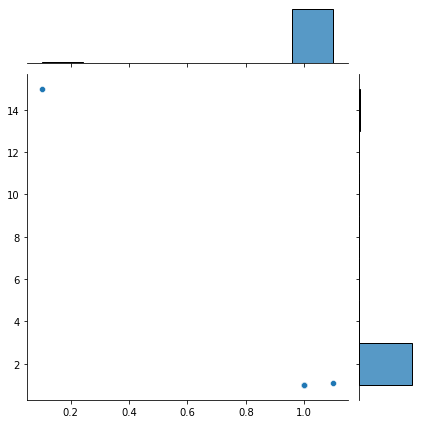

In [2]:
n=50
# want for all n, pearson correlation < -0.9
# for n-1, pearson correlation > -0.2

x = np.ones(n)
y = np.ones(n)

# make negative correlation stronger when last element is excluded
x[n-2] = 1.1
y[n-2] = 1.1

x[n-1] = 0.1
y[n-1] = 15

print('Overall pearson correlation = ', pearsonr(x ,y))
print('Overall pearson correlation < -0.9 = ', pearsonr(x ,y)[0] < -0.9)

print('Pearson correlation excluding last element = ', pearsonr(x[:-1], y[:-1]))
print('Pearson correlation excluding last element > -0.2 = ', pearsonr(x[:-1], y[:-1])[0] > -0.2)

# plot
plt.figure(figsize=(5,5))
sns.jointplot(x,y)

# print table
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

Overall Spearman correlation =  SpearmanrResult(correlation=-0.4982592620706775, pvalue=0.00023116660091557732)
Overall Kendall correlation =  KendalltauResult(correlation=-0.019599838302001012, pvalue=0.8408834182780601)
Kendall > Spearman + 0.45 =  True
     x          y
0    0  25.000000
1    1  26.041667
2    2  27.083333
3    3  28.125000
4    4  29.166667
5    5  30.208333
6    6  31.250000
7    7  32.291667
8    8  33.333333
9    9  34.375000
10  10  35.416667
11  11  36.458333
12  12  37.500000
13  13  38.541667
14  14  39.583333
15  15  40.625000
16  16  41.666667
17  17  42.708333
18  18  43.750000
19  19  44.791667
20  20  45.833333
21  21  46.875000
22  22  47.916667
23  23  48.958333
24  24  50.000000
25  25   0.000000
26  26   1.041667
27  27   2.083333
28  28   3.125000
29  29   4.166667
30  30   5.208333
31  31   6.250000
32  32   7.291667
33  33   8.333333
34  34   9.375000
35  35  10.416667
36  36  11.458333
37  37  12.500000
38  38  13.541667
39  39  14.583333
40  40

<Figure size 360x360 with 0 Axes>

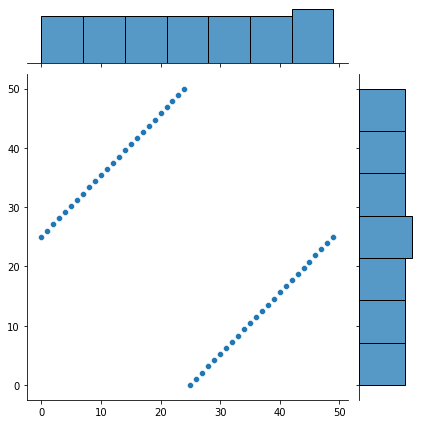

In [3]:
n=50
# want kendall much greater than spearman
# create two sep groups of data

y1 = np.linspace(0, n/2, 25)
y2 = np.linspace(n/2, n, 25)
y = np.concatenate((y2, y1), axis=0)
x = np.arange(n)


print('Overall Spearman correlation = ', spearmanr(x ,y))
print('Overall Kendall correlation = ', kendalltau(x ,y))
print('Kendall > Spearman + 0.45 = ', (kendalltau(x ,y)[0] > spearmanr(x ,y)[0] +0.45))

# plot
plt.figure(figsize=(5,5))
sns.jointplot(x,y)

# print table
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

Overall Spearman correlation =  SpearmanrResult(correlation=0.4982592620706775, pvalue=0.00023116660091557732)
Overall Kendall correlation =  KendalltauResult(correlation=0.019599838302001012, pvalue=0.8408834182780601)
Kendall < Spearman - 0.45 =  True
     x          y
0    0  25.000000
1    1  23.958333
2    2  22.916667
3    3  21.875000
4    4  20.833333
5    5  19.791667
6    6  18.750000
7    7  17.708333
8    8  16.666667
9    9  15.625000
10  10  14.583333
11  11  13.541667
12  12  12.500000
13  13  11.458333
14  14  10.416667
15  15   9.375000
16  16   8.333333
17  17   7.291667
18  18   6.250000
19  19   5.208333
20  20   4.166667
21  21   3.125000
22  22   2.083333
23  23   1.041667
24  24   0.000000
25  25  50.000000
26  26  48.958333
27  27  47.916667
28  28  46.875000
29  29  45.833333
30  30  44.791667
31  31  43.750000
32  32  42.708333
33  33  41.666667
34  34  40.625000
35  35  39.583333
36  36  38.541667
37  37  37.500000
38  38  36.458333
39  39  35.416667
40  40  

<Figure size 360x360 with 0 Axes>

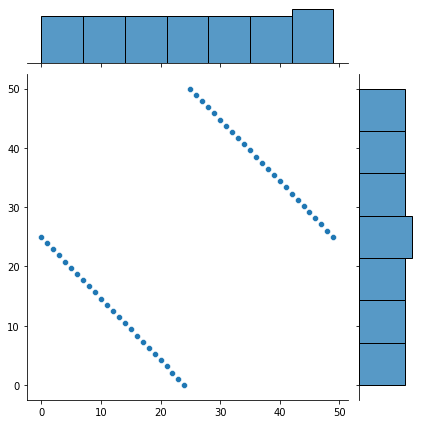

In [4]:
n=50
# opposite of previous part - just reverse the y values

y1 = np.linspace(0, n/2, 25)
y1 = y1[::-1]
y2 = np.linspace(n/2, n, 25)
y2 = y2[::-1]
y = np.concatenate((y1, y2), axis=0)
x = np.arange(n)


print('Overall Spearman correlation = ', spearmanr(x ,y))
print('Overall Kendall correlation = ', kendalltau(x ,y))
print('Kendall < Spearman - 0.45 = ', (kendalltau(x ,y)[0] < spearmanr(x ,y)[0] - 0.45))

# plot
plt.figure(figsize=(5,5))
sns.jointplot(x,y)

# print table
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

Overall Spearman correlation =  SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
Overall Pearson correlation =  (0.3521677900413917, 0.012136857364561859)
Pearson < Spearman - 0.6 =  True
     x         y
0    0  0.000000
1    1  0.000100
2    2  0.000200
3    3  0.000300
4    4  0.000400
5    5  0.000500
6    6  0.000600
7    7  0.000700
8    8  0.000800
9    9  0.000900
10  10  0.001000
11  11  0.001100
12  12  0.001200
13  13  0.001300
14  14  0.001400
15  15  0.001500
16  16  0.001600
17  17  0.001700
18  18  0.001800
19  19  0.001900
20  20  0.002000
21  21  0.002100
22  22  0.002200
23  23  0.002300
24  24  0.002400
25  25  0.002500
26  26  0.002600
27  27  0.002700
28  28  0.002800
29  29  0.002900
30  30  0.003000
31  31  0.003100
32  32  0.003200
33  33  0.003300
34  34  0.003400
35  35  0.003500
36  36  0.003600
37  37  0.003700
38  38  0.003800
39  39  0.003900
40  40  0.004000
41  41  0.004100
42  42  0.004200
43  43  0.004300
44  44  0.004400
45  45  0.248548
46

<Figure size 360x360 with 0 Axes>

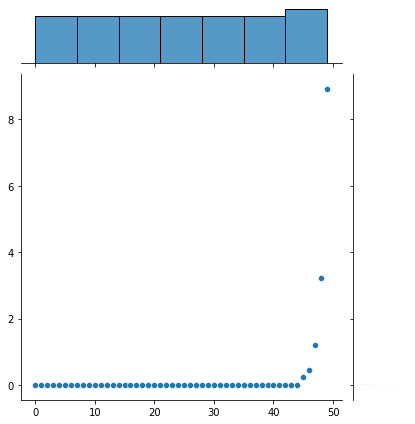

In [5]:
# want spearman much greater than pearson
# pearson looks for linearity, spearman looks for monotonicity
# so we want a monotonic but curved relationship - sample from exponenetial dist

n = 50

x = np.arange(n)
y1 = []
c=0
for i in range(45):
    i=0+c
    c=c+0.0001
    y1.append(i)
    
np.random.seed(24)
y2 = np.random.exponential(scale=1, size=5) 
# sort
y2 = np.sort(y2)
y = np.concatenate((y1,y2), axis=0)

print('Overall Spearman correlation = ', spearmanr(x ,y))
print('Overall Pearson correlation = ', pearsonr(x ,y))
print('Pearson < Spearman - 0.6 = ', (pearsonr(x ,y)[0] < spearmanr(x ,y)[0] - 0.6))

# plot
plt.figure(figsize=(5,5))
sns.jointplot(x,y)

# print table
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

Overall Spearman correlation =  SpearmanrResult(correlation=-0.6613995485327313, pvalue=1.7057638652917169e-07)
Overall Pearson correlation =  (0.8090244228262129, 1.1715364555877893e-12)
Pearson > Spearman + 1.2 =  True
      x           y
0     0    0.892736
1     1    0.564242
2     2    0.352091
3     3    0.321931
4     4    0.285468
5     5    0.283735
6     6    0.230401
7     7    0.224024
8     8    0.223912
9     9    0.197771
10   10    0.189931
11   11    0.185931
12   12    0.185011
13   13    0.164620
14   14    0.141798
15   15    0.134646
16   16    0.123667
17   17    0.120235
18   18    0.114018
19   19    0.111415
20   20    0.102785
21   21    0.099742
22   22    0.097916
23   23    0.096679
24   24    0.095360
25   25    0.082492
26   26    0.081392
27   27    0.078211
28   28    0.076503
29   29    0.076382
30   30    0.069250
31   31    0.066559
32   32    0.053928
33   33    0.051453
34   34    0.048448
35   35    0.045636
36   36    0.044794
37   37    0.038643

<Figure size 360x360 with 0 Axes>

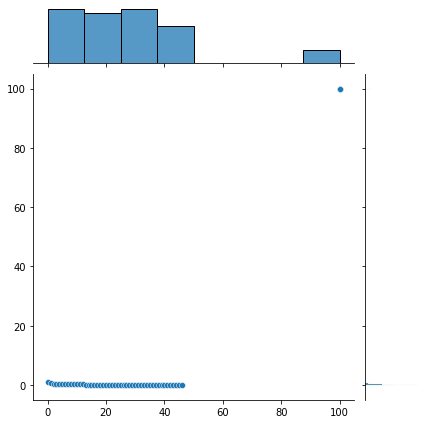

In [6]:
# opposite - want pearson much higher than spearman
# so want linears but not monotonic relationship
# spearman must be negative

n = 50
x1 = np.arange(47)
x2 = [100]*3
x = np.concatenate((x1,x2), axis=0)

np.random.seed(24)
y1 = np.random.exponential(scale=0.1, size=47) 
# sort
y1 = np.sort(y1)[::-1]
y2 = [100]*3
y = np.concatenate((y1,y2), axis=0)


print('Overall Spearman correlation = ', spearmanr(x ,y))
print('Overall Pearson correlation = ', pearsonr(x ,y))
print('Pearson > Spearman + 1.2 = ', (pearsonr(x ,y)[0] > spearmanr(x ,y)[0] + 1.2))

# plot
plt.figure(figsize=(5,5))
sns.jointplot(x,y)

# print table
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

This is not possible.
This scenario would require the Spearman's correlation to be greater than Kendall's by more than 1.2.
Spearman looks at monotonicity, and checks if rank orders between X and Y agree.
Kendall looks at concordant and discordant pairs, and checks if rank orders for both (x,y) coordinates of each element agree.
While the two correlation measures can differ, and can even have opposing signs, the factors that influence them are highly dependant on one another, and so it is not possible for the difference between them to be so large.

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


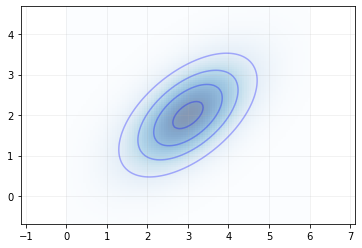

In [7]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    # need to change levels or possibly delete them.. 
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [8]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

1. age

2. sex (1 = male; 0 = female)

3. cp: chest pain type
  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
  Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
  Value 1: upsloping
  Value 2: flat
  Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. target: diagnosis of heart disease (angiographic disease status)
  Value 0: < 50% diameter narrowing
  Value 1: > 50% diameter narrowing

In [10]:
factor_dict = {'sex':{0:'Female', 1:'Male'},
               'cp':{0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal', 3:'Asymptomatic'},
               'fbs':{0:'<=120 mg/dl', 1:'>120 mg/dl'},
               'restecg':{0:'Normal', 1:'Abnormal', 2:'Definite'},
               'exang':{0:'No', 1:'Yes'},
               'slope':{0:'Upsloping', 1:'Flat', 2:'Downsloping'},
               'thal':{0:np.nan, 2:'Normal', 1:'Fixed', 3:'Reversable'},
               'target':{0:'Healthy', 1:'Disease'}
               }

df.replace(factor_dict, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,Asymptomatic,145.0,233.0,>120 mg/dl,Normal,150.0,No,2.3,Upsloping,0,Fixed,Disease
1,37.0,Male,NaN,130.0,250.0,<=120 mg/dl,Abnormal,187.0,No,3.5,Upsloping,0,Normal,Disease
2,41.0,Female,Atypical Angina,NaN,NaN,<=120 mg/dl,Normal,172.0,No,1.4,Downsloping,0,Normal,Disease
3,NaN,Male,Atypical Angina,120.0,236.0,<=120 mg/dl,Abnormal,178.0,No,0.8,Downsloping,0,Normal,Disease
4,NaN,Female,Typical Angina,120.0,354.0,<=120 mg/dl,Abnormal,163.0,Yes,0.6,Downsloping,0,Normal,Disease


##### There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).

In [11]:
df.isnull().sum().to_frame().rename({0:"total missing values"}, axis=1)

,total missing values
age,8
sex,4
cp,5
trestbps,6
chol,6
fbs,3
restecg,2
thalach,4
exang,0
oldpeak,5


In [12]:
types = pd.DataFrame(df.dtypes).rename({0:'type'}, axis=1)

object_cols = list(types[types['type'] == object].index.values)
float_cols = list(types[types['type'] == float].index.values)

# replace nans in categorical with the corresponding mode
df_objects = df[object_cols].apply(
    lambda x: x.fillna(x.value_counts().index[0]))

# replace nans in quantitative columns with corresponding median
df_floats = df[float_cols].fillna(df[float_cols].median())

In [13]:
new_df = df_objects.join(df_floats)
new_df.isnull().sum().to_frame().rename({0:"total missing values"}, axis=1)

,total missing values
sex,0
cp,0
fbs,0
restecg,0
exang,0
slope,0
thal,0
target,0
age,0
trestbps,0


##### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

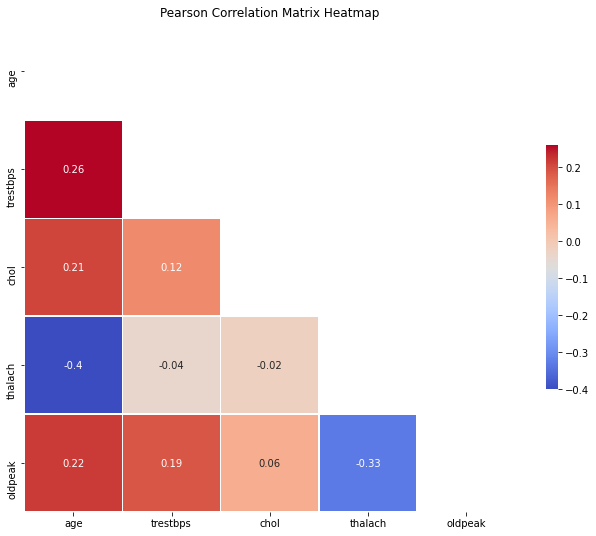

In [14]:
corr_mat = round(new_df.corr(), 2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Matrix Heatmap");

In [15]:
pearson_corrs = {}
for col_id in range(len(float_cols)):
    for j_col_id in range(col_id+1, len(float_cols)):
        pearson_corrs[(float_cols[col_id],float_cols[j_col_id])] = pearsonr(
            new_df[float_cols[col_id]], new_df[float_cols[j_col_id]])
        
pears_df = pd.DataFrame(pearson_corrs).rename({0:"corr", 1:"p-value"}, axis=0).transpose()

# drop correlations with p-value > 0.05 (95% confidence level)
significant_corrs = pears_df[pears_df["p-value"] <= 0.05]

 These seven out of ten correlations are statistically significant using a 95% confidence level

In [16]:
significant_corrs

corr       p-value
age      trestbps  0.256794  5.963857e-06
         chol      0.208909  2.503462e-04
         thalach  -0.401671  3.556044e-13
         oldpeak   0.218477  1.262282e-04
trestbps chol      0.115282  4.495263e-02
         oldpeak   0.194220  6.757819e-04
thalach  oldpeak  -0.330060  3.923579e-09

below ill plot the two most significant correlation values (age, thalach), (age, oldpeak) and find their bivariate fits.

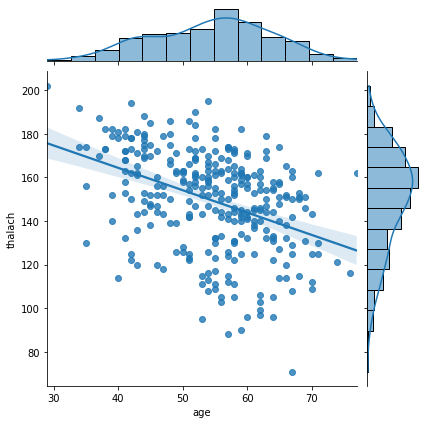

In [17]:
sns.jointplot(data=new_df, y="thalach", x="age", kind="reg");

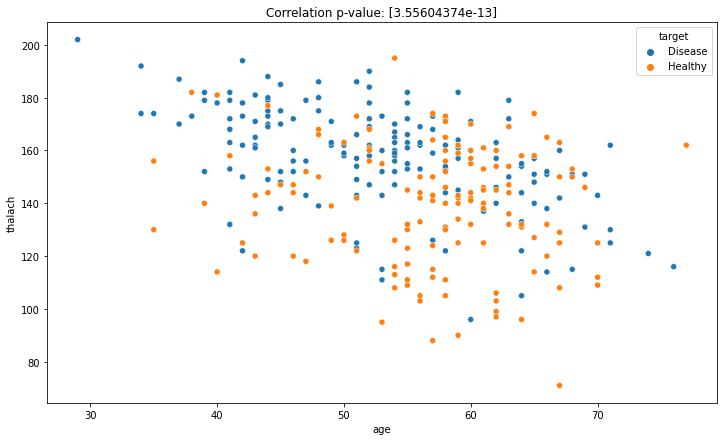

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=new_df, y="thalach", x="age", hue="target")
plt.title("Correlation p-value: " + 
          str(significant_corrs.reset_index().iloc[[2]]['p-value'].values));

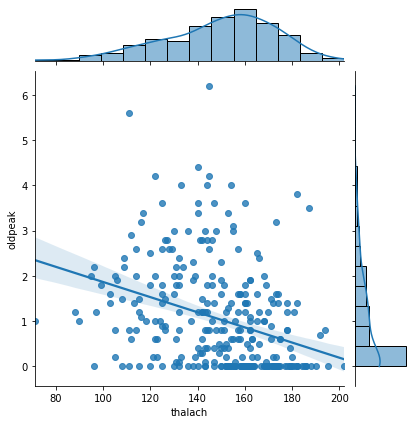

In [19]:
sns.jointplot(data=new_df, y="oldpeak", x="thalach", kind='reg');

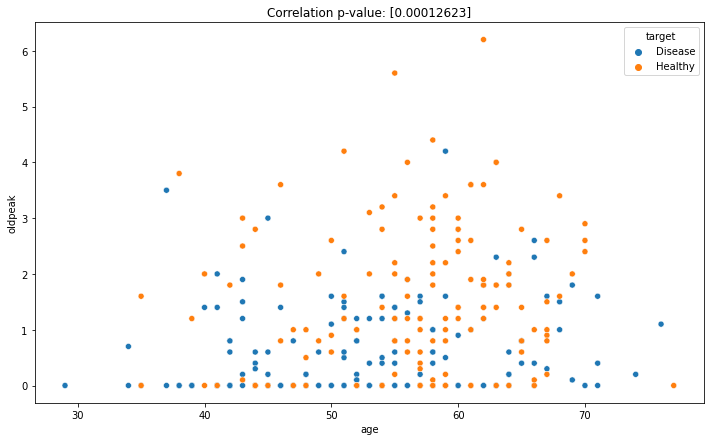

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=new_df, y="oldpeak", x="age", hue="target")
plt.title("Correlation p-value: " + 
          str(significant_corrs.reset_index().iloc[[3]]['p-value'].values));

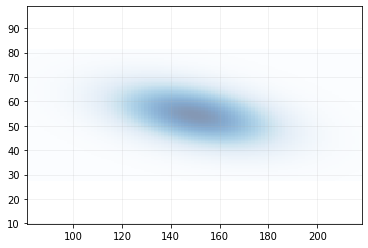

In [21]:
# finding bivariate normal fit
means = [new_df.thalach.mean(), new_df.age.mean()]
covs = np.cov([new_df.thalach.values, new_df.age.values])

plot_2d_Gaussian_pdf(means, covs)

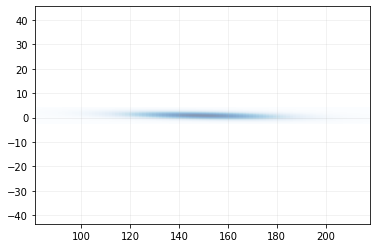

In [22]:
means = [new_df.thalach.mean(), new_df.oldpeak.mean()]
covs = np.cov([new_df.thalach.values, new_df.oldpeak.values])

plot_2d_Gaussian_pdf(means, covs)

##### Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

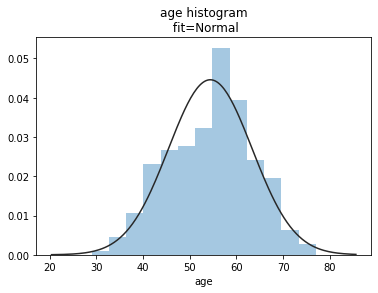

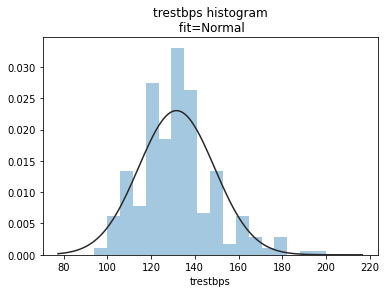

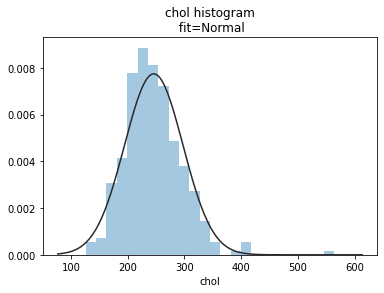

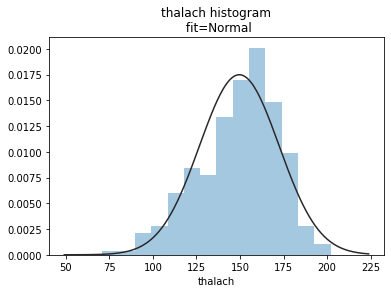

In [23]:
from scipy.stats import expon, norm, lognorm
for i, col in enumerate(float_cols[:-1]):
    plt.figure(i)
    sns.distplot(new_df[col], kde=False, fit=norm)
    plt.title(str(col) + " histogram" + "\n fit=Normal")

The above distributions all look Normal but oldpeak (below), looks more like the Exponential distribution.

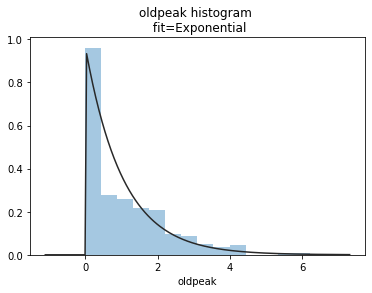

In [24]:
sns.distplot(new_df[float_cols[-1]], kde=False, fit=expon)
plt.title("oldpeak histogram \n fit=Exponential");

##### Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

In [25]:
healthy = new_df[new_df.loc[:,"target"] == "Healthy"]
disease = new_df[new_df.loc[:,"target"] == "Disease"]
male = new_df[new_df.loc[:,"sex"] == "Male"]
female = new_df[new_df.loc[:,"sex"] == "Female"]

In [26]:
healthy_mean = pd.DataFrame(healthy.mean()).rename(
    {0:"healthy mean_value"}, axis=1)

disease_mean = pd.DataFrame(disease.mean()).rename(
    {0:"disease mean_value"}, axis=1)

stds = healthy.std().to_frame().rename({0:"healthy std_value"}, axis=1).join(
disease.std().to_frame().rename(
    {0:"disease std_value"}, axis=1)).reset_index().rename(
        {"index":"col_name"}, axis=1)

means = healthy_mean.join(disease_mean).reset_index().rename({"index":"col_name"}, axis=1)
means["mean_diff"] = means["healthy mean_value"] - means["disease mean_value"]

stats = means.merge(stds, on="col_name").merge(
    new_df.std().to_frame().rename(
        {0:"total_std"}, axis=1).reset_index().rename(
            {'index':'col_name'},axis=1), on="col_name")
stats

,col_name,healthy mean_value,disease mean_value,mean_diff,healthy std_value,disease std_value,total_std
0,age,56.666667,52.515152,4.151515,7.900229,9.377325,8.964069
1,trestbps,134.398551,129.315152,5.083399,18.729944,15.810928,17.358758
2,chol,250.572464,241.896970,8.675494,49.379934,53.220391,51.604360
3,thalach,139.072464,158.424242,-19.351779,22.516057,19.159520,22.858624
4,oldpeak,1.571739,0.589091,0.982648,1.303336,0.780089,1.158160


In [27]:
alpha = 0.05
n_healthy = len(healthy)
n_disease = len(disease)

left_point = []
right_point = []
for i in range(len(stats)):
    left_point.append(stats.iloc[i][3] - norm.ppf(1 - alpha/2) * (stats.iloc[i][4]**2/n_healthy + stats.iloc[i][5]**2/n_disease)**(1/2))
    right_point.append(stats.iloc[i][3] + norm.ppf(1 - alpha/2) * (stats.iloc[i][4]**2/n_healthy + stats.iloc[i][5]**2/n_disease)**(1/2))
    

$\mu_H - \mu_D \in \bar{x}_H - \bar{x}_D \pm \Phi^{-1}(1 - \frac{\alpha}{2}) \sqrt{\frac{\sigma_H^2}{n_H} + \frac{\sigma_D^2}{n_D}}$

$\alpha = 0.05$ for 95% confidence level.

If $\mu_H - \mu_D > 0$ then the healthy mean value is larger.

If $\mu_H - \mu_D < 0$ then the healthy mean value is smaller.

Since we are looking at intervals, I can say with 95% confidence that the healthy mean values $\bar{x}_H$ are larger than disease mean values $\bar{x}_D$, if the entire interval $[a,b]>0$ where $a$ and $b$ are the left and right endpoints respectively of the calculated interval above. 

Similarly I will say with 95% confidence the healthy mean values $\bar{x}_H$ are smaller than disease mean values $\bar{x}_D$ if $[a,b]<0$

If the interval $[a,b]$ contains $0$, then the results are inconclusive, like in the case for chol below.

In [28]:
intervals = list(zip(left_point, right_point))
intervals_df = stats[["col_name"]].join(pd.DataFrame(pd.Series(intervals))).rename({0:"interval"},axis=1)
intervals_df

,col_name,interval
0,age,"(2.2061017425831198, 6.096928560447178)"
1,trestbps,"(1.1355575846807615, 9.031240834291587)"
2,chol,"(-2.892532620825957, 20.243520763118422)"
3,thalach,"(-24.11190418153853, -14.591653130714466)"
4,oldpeak,"(0.7347501801873131, 1.230546262500434)"


##### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

In [29]:
male_corrs = {}
female_corrs = {}
healthy_corrs = {}
disease_corrs = {}

for col_id in range(len(float_cols)):
    for j_col_id in range(col_id+1, len(float_cols)):
        
        male_corrs[(float_cols[col_id],float_cols[j_col_id])] = pearsonr(
            male[float_cols[col_id]], male[float_cols[j_col_id]])
        
        female_corrs[(float_cols[col_id],float_cols[j_col_id])] = pearsonr(
            female[float_cols[col_id]], female[float_cols[j_col_id]])
        
        healthy_corrs[(float_cols[col_id],float_cols[j_col_id])] = pearsonr(
            healthy[float_cols[col_id]], healthy[float_cols[j_col_id]])
        
        disease_corrs[(float_cols[col_id],float_cols[j_col_id])] = pearsonr(
            disease[float_cols[col_id]], disease[float_cols[j_col_id]])
        
male_pears_df = pd.DataFrame(male_corrs).rename(
    {0:"male corr", 1:"male p-value"}, axis=0).transpose()

female_pears_df = pd.DataFrame(female_corrs).rename(
    {0:"female corr", 1:"female p-value"}, axis=0).transpose()

healthy_pears_df = pd.DataFrame(healthy_corrs).rename(
    {0:"healthy corr", 1:"healthy p-value"}, axis=0).transpose()

disease_pears_df = pd.DataFrame(disease_corrs).rename(
    {0:"disease corr", 1:"disease p-value"}, axis=0).transpose()

joined_sex_corrs = male_pears_df.join(female_pears_df)
joined_target_corrs = healthy_pears_df.join(disease_pears_df)

male_significant_corrs = male_pears_df[male_pears_df["male p-value"]<0.05]
female_significant_corrs = female_pears_df[female_pears_df["female p-value"]<0.05]
healthy_significant_corrs = healthy_pears_df[healthy_pears_df["healthy p-value"]<0.05]
disease_significant_corrs = disease_pears_df[disease_pears_df["disease p-value"]<0.05]

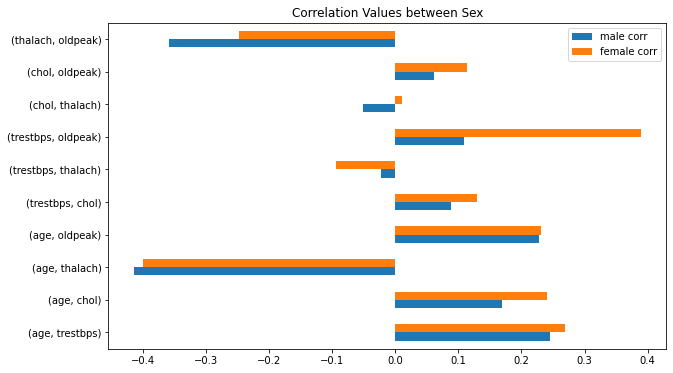

In [30]:
joined_sex_corrs[['male corr', 'female corr']].plot(kind='barh', figsize=(10,6),
                                               title="Correlation Values between Sex");

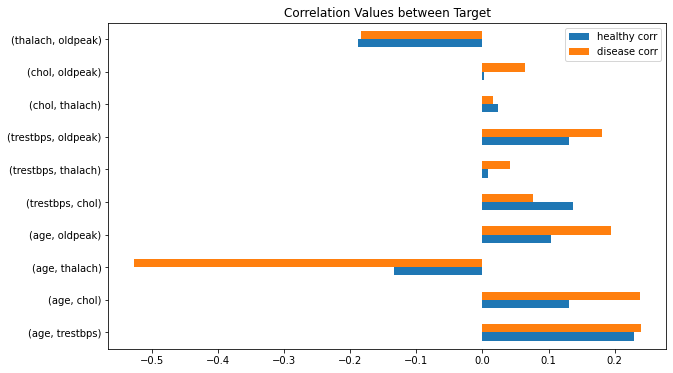

In [31]:
joined_target_corrs[['healthy corr', 'disease corr']].plot(kind='barh', figsize=(10,6),
                                               title="Correlation Values between Target");

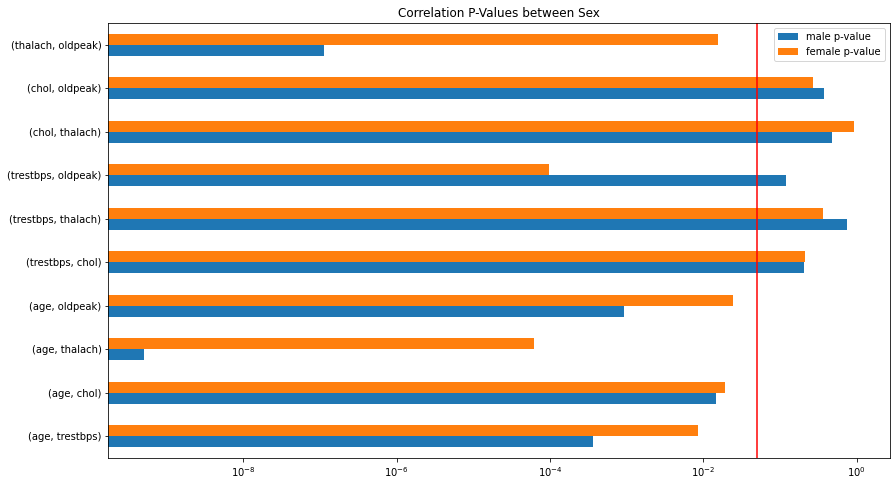

In [32]:
joined_sex_corrs[['male p-value', 'female p-value']].plot(
    kind='barh', logx=True, figsize=(14,8),
    title="Correlation P-Values between Sex")
plt.vlines(ymin=-1, ymax=30, x=0.05, color='r');

(trestbps, chol), (trestbps, thalach), (chol, thalach), and (chol, oldpeak) are all significantly correlated for males but not females.

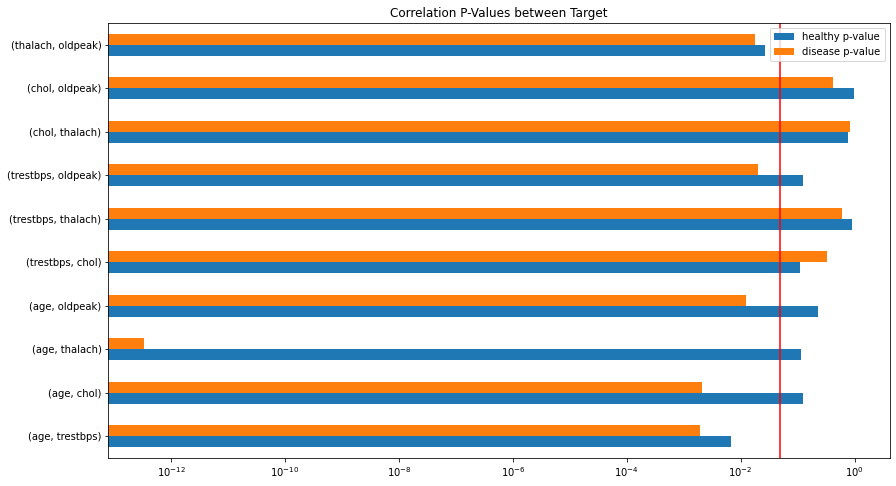

In [33]:
joined_target_corrs[['healthy p-value', 'disease p-value']].plot(
    kind='barh', logx=True, figsize=(14,8),
    title="Correlation P-Values between Target")
plt.vlines(ymin=-1, ymax=30, x=0.05, color='r');

The only features which are significantly correlated between healthy and disease are (age, trestbps) and (thalach, oldpeak). The rest are significant in the disease data but not in healthy.

##### For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

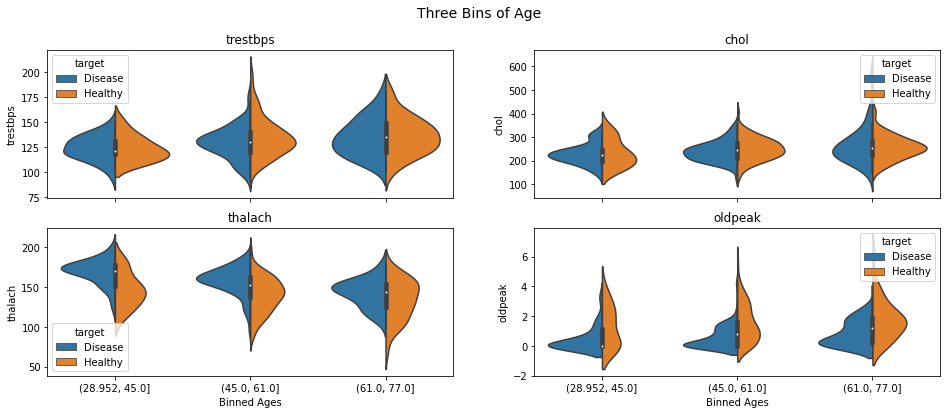

In [34]:
new_df["Binned Ages"] = pd.cut(new_df.age, 3)

fig, ax = plt.subplots(2,2, figsize=(16,6), sharex=True)
ax = ax.ravel()
for i, col in enumerate(float_cols[1:]):
    sns.violinplot(x='Binned Ages', y=col, data=new_df, hue='target', split=True, ax=ax[i])
    ax[i].set_title(str(col))
    if i in (0,1):
        ax[i].set_xlabel('')
plt.suptitle('Three Bins of Age', size=14);

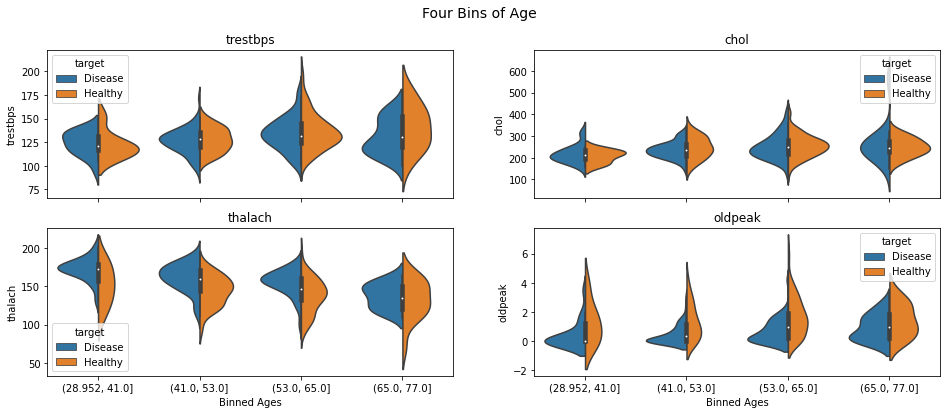

In [35]:
new_df["Binned Ages"] = pd.cut(new_df.age, 4)

fig, ax = plt.subplots(2,2, figsize=(16,6), sharex=True)
ax = ax.ravel()
for i, col in enumerate(float_cols[1:]):
    sns.violinplot(x='Binned Ages', y=col, data=new_df, hue='target', split=True, ax=ax[i])
    ax[i].set_title(str(col))
    if i in (0,1):
        ax[i].set_xlabel('')
plt.suptitle('Four Bins of Age', size=14);

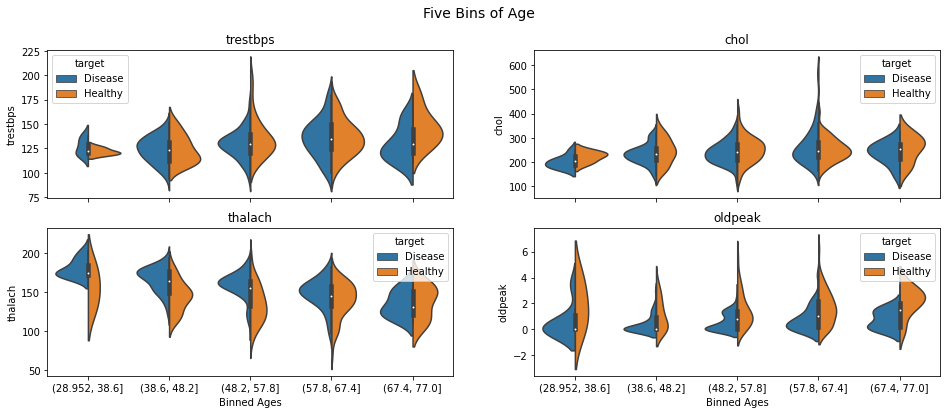

In [36]:
new_df["Binned Ages"] = pd.cut(new_df.age, 5)

fig, ax = plt.subplots(2,2, figsize=(16,6), sharex=True)
ax = ax.ravel()
for i, col in enumerate(float_cols[1:]):
    sns.violinplot(x='Binned Ages', y=col, data=new_df, hue='target', split=True, ax=ax[i])
    ax[i].set_title(str(col))
    if i in (0,1):
        ax[i].set_xlabel('')
plt.suptitle('Five Bins of Age', size=14);

Oldpeak and Thalach are by far the most interesting plots above, regardless of there being three, four, or five bins of age—There is a clear difference between target variables in all three variations of these plots. This is especially true in the younger bins of age. 

##### Suggest, state and address at least one original question: 
##### Which  categorical features vary the most between the target variable? Construct confidence intervals to back your claim. Can I say with 95% confidence that there are more healthy or diseased females? What about males? For each binary categorical feature, explore this question.  

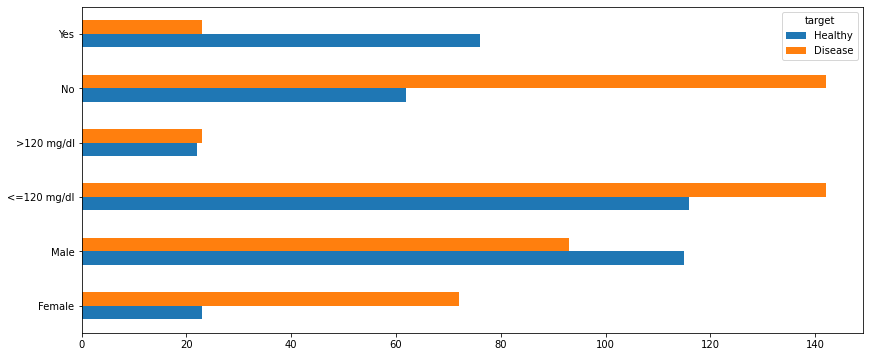

In [37]:
binary_cols = ['sex', 'fbs', 'exang']
crosstabs = [pd.crosstab(new_df[binary_cols[i]], new_df.target) for i in range(len(binary_cols))]
total_cross = pd.concat(crosstabs)[["Healthy", "Disease"]]
total_cross.plot(kind='barh', figsize=(14,6));

$\Delta \in (\hat{p_1} - \hat{p_2}) \pm \Phi^{-1}(1 - \frac{\alpha}{2}) \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$

In [38]:
n = len(new_df)
alpha = 0.05

left = []
right = []
for i in range(len(total_cross)):
    n_H = total_cross.iloc[i][0]
    n_D = total_cross.iloc[i][1]
    prop_diff = n_H/n - n_D/n
    inverse_phi = norm.ppf(1-alpha/2)
    var = (n_H/n * (1 - n_H/n))/n_H + (n_D/n * (1 - n_D/n))/n_D
    left.append(prop_diff - inverse_phi*var**(1/2))
    right.append(prop_diff + inverse_phi*var**(1/2))
    
intervals = list(zip(left, right))
pd.DataFrame(total_cross.index).rename(
    {0:"binary_cols"}, axis=1).join(pd.DataFrame(pd.Series(intervals))).rename(
    {0:"interval"},axis=1)

,binary_cols,interval
0,Female,"(-0.30793924659005883, -0.01549309664426457)"
1,Male,"(-0.056439467612608235, 0.20165398906475343)"
2,<=120 mg/dl,"(-0.2064774060343722, 0.03486024431820062)"
3,>120 mg/dl,"(-0.15651025262296353, 0.14990959255695696)"
4,No,"(-0.3937199858005602, -0.1343328194799678)"
5,Yes,"(0.02926784280867753, 0.3205671406896723)"


There are more diseased females than healthy. There is more exercise induced angina in the healthy population than disease. 

##### Which feature is the best predictor of healthy vs disease? i.e. which distributions have the least overlap between the healthy and disease groups?

The following sets of plots aim to answer this question. We look for points that are least overlapping, and introduce a computation of entropy within a single distribution between healthy and disease points to numerically check this. 

In [39]:
# for i, col in enumerate(float_cols[:-1]):
#     sns.catplot(x="target", y=col, hue="sex", data=new_df, kind='bar');

<Figure size 432x288 with 0 Axes>

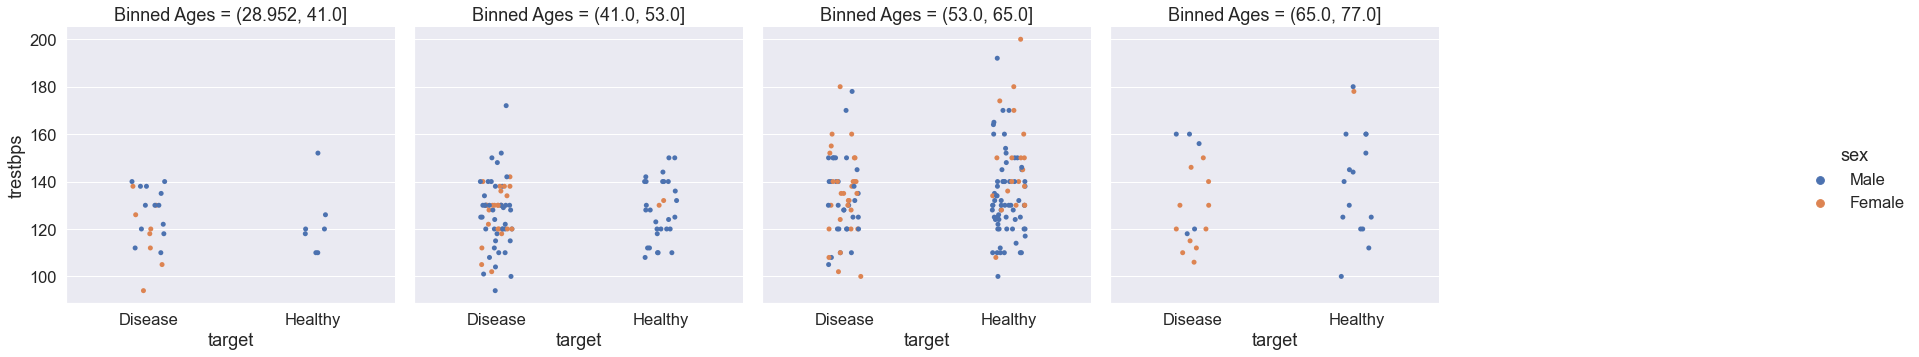

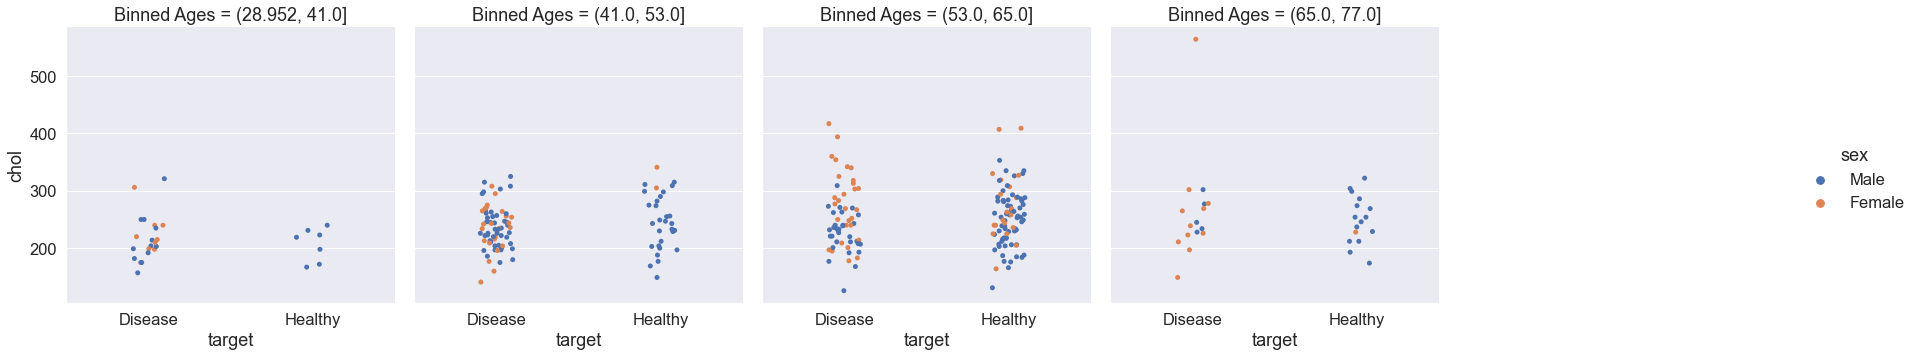

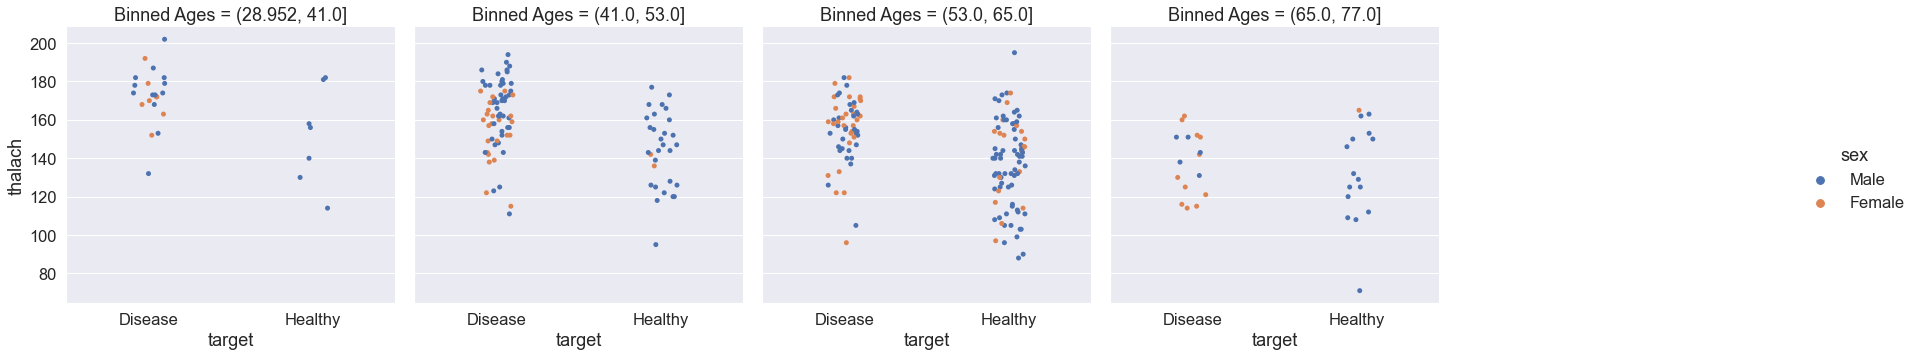

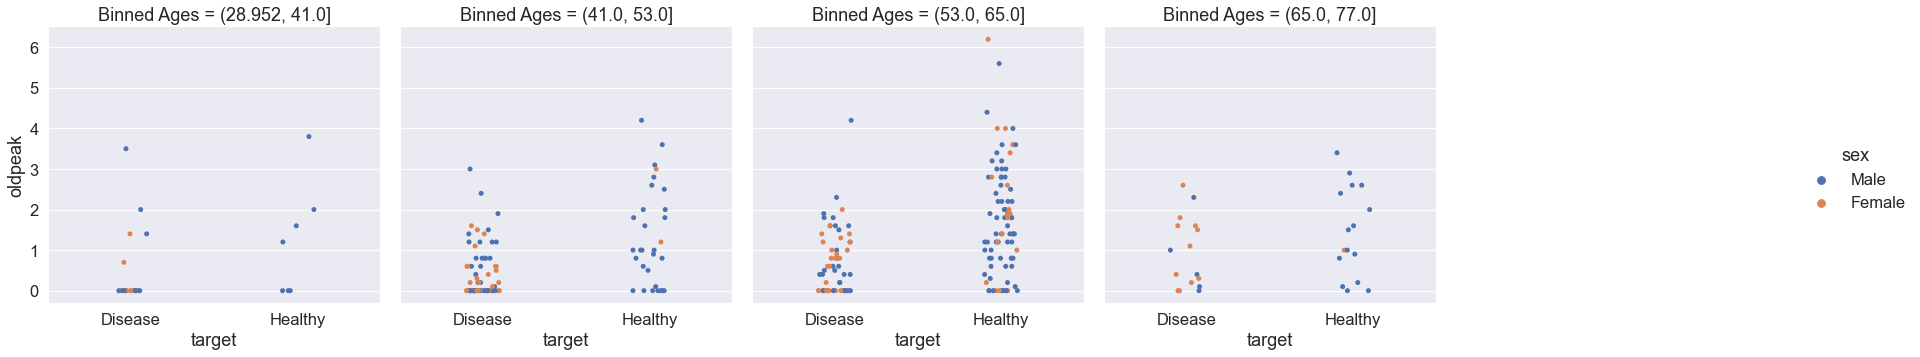

In [40]:
new_df["Binned Ages"] = pd.cut(new_df.age, 4)
sns.set(font_scale=1.5)
for i, col in enumerate(float_cols[1:]):
    plt.figure(i);
    sns.catplot(x="target", y=col, hue="sex", data=new_df, col="Binned Ages", col_wrap=5);

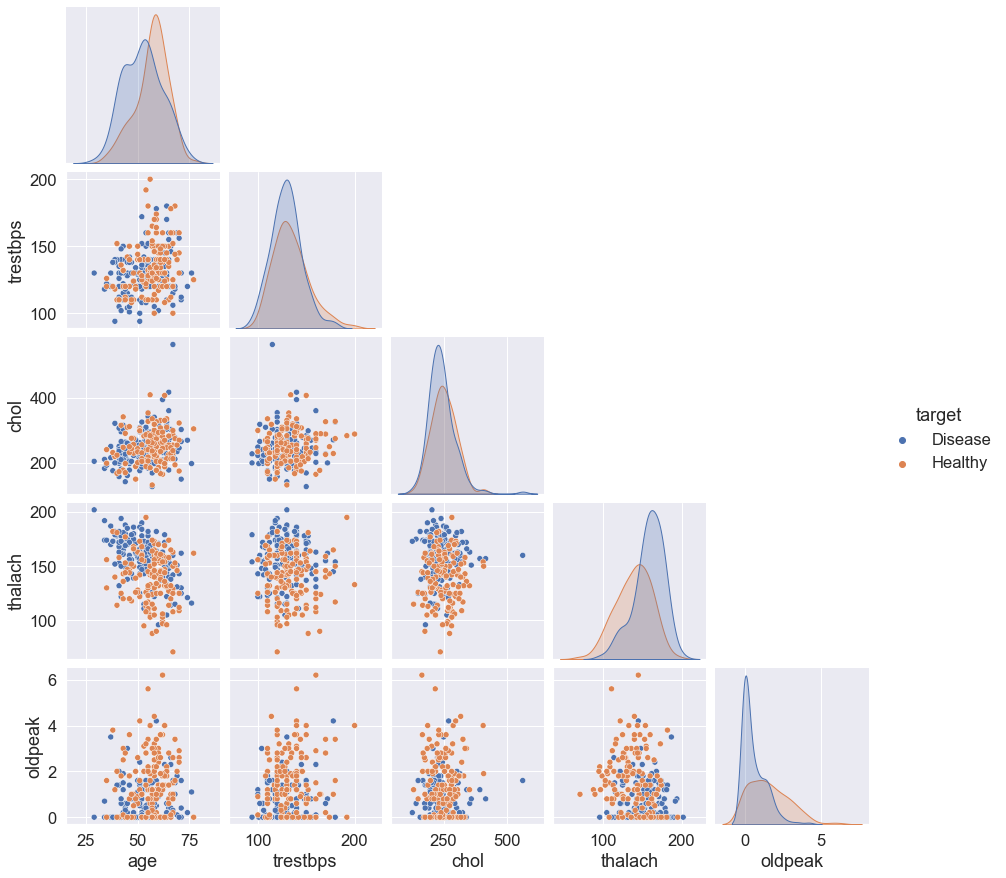

In [41]:
sns.pairplot(new_df, hue='target', corner=True);

In [42]:
from scipy.stats import entropy
import random

target_entropy = {}
for col in float_cols:
    target_entropy[col] = entropy(pk=healthy[col].values,
                                qk=random.sample(list(disease[col].values), 138))

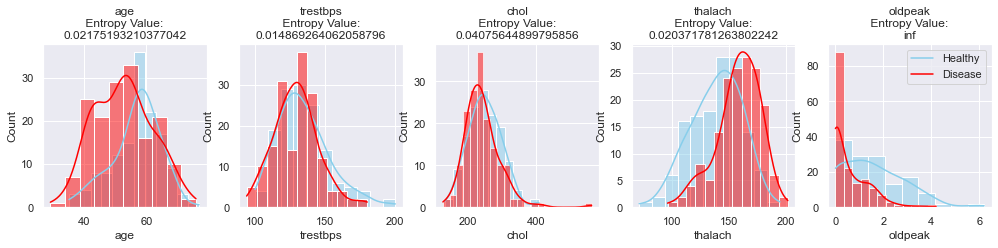

In [43]:
sns.set(font_scale=1)
fig, ax = plt.subplots(1,5, figsize=(17,3))
for i, col in enumerate(float_cols):
    sns.histplot(healthy[col], color="skyblue", label="Healthy", kde=True, ax=ax[i])
    sns.histplot(disease[col], color="red", label="Disease", kde=True, ax=ax[i])    
    ax[i].set_title(str(col) + "\n Entropy Value: \n" + str(list(target_entropy.values())[i]))
    plt.legend(labels=["Healthy", "Disease"])

Thalach and oldpeak seem to have the clearest difference between healthy and disease patients, making them the 'best predictors' for our use case. 

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

The standard log-normal distribution does have a heavy right tail. Let $X$ be a standard log-normal distribution, then $X=e^Z$ where $Z$ is standard normal. By applying definition of heavy tail distribution:

$$ \lim_{x\to\infty} e^{tx}P(X>x)= \lim_{x\to\infty} e^{tx}P(e^Z>x)= \lim_{x\to\infty} e^{tx}P(Z>lnx)= \lim_{x\to\infty} e^{tx}[1 - \phi(lnx)]= \lim_{x\to\infty} \frac{\phi(-lnx)}{e^{-tx}} $$
$$ \underset{L'Hôpital's}{=}\lim_{x\to\infty}\frac{\phi\left(-\ln x\right)}{-te^{-tx}}\cdot\left(-\frac{1}{x}\right){=}\lim_{x\to\infty}\frac{e^{-\frac{\ln^{2}x}{2}}}{\sqrt{2\pi}txe^{-tx}}=\lim_{x\to\infty}\frac{1}{\sqrt{2\pi}t}\frac{e^{tx-\frac{\ln^{2}x}{2}}}{x}$$

$$\underset{L'Hôpital's}{=}\lim_{x\to\infty}\frac{1}{\sqrt{2\pi}t}\frac{e^{tx-\frac{\ln^{2}x}{2}}\cdot\left(t-\frac{\ln x}{x}\right)}{1}=\lim_{x\to\infty}-\frac{\left(t-\frac{\ln x}{x}\right)}{\sqrt{2\pi}t}e^{x\left(t-\frac{\ln^{2}x}{2x}\right)}\underset{\frac{\ln x}{x}\rightarrow0}{=}\frac{t-0}{\sqrt{2\pi}t}e^{\infty\left(t-0\right)}\underset{t>0}{=}\infty$$


And thus we have shown the standard log-normal distribution indeed has a heavy right tail.

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$$P(X_1 < X_2) \iff  \int_{0}^{x} P( X_1 = x | X_2 > x ) dx \overset{X_1, X_2 independent}{\iff} \int_{0}^{x} P(X_1 = x) P(X_2>x) dx \iff \int_{0}^{x} P(X_1=x)  (1 - P(X_2 \le x) dx \iff \int_{0}^{x} f_{X_1}(x) (1 - F_{X_2}(x)) dx$$ 

Note:                            
$$ F_{X_2}(x) = \int_{0}^{x}f_{X_2}(t)dt = \int_{0}^{x} \lambda_2 e^{-\lambda_2  t} dt = 1-e^{-\lambda_2  x}$$

Now simplify the integrand and combine with the above note:

$$ \Longrightarrow f_{X_1}(x) (1 - F_{X_2}(x)) \iff \lambda_1 e^{-\lambda_1 x} \cdot (1 - (1-e^{-\lambda_2 x}) \iff \lambda_1 e^{-\lambda_1 x} \cdot e^{-\lambda_2  x} \iff \lambda_1 e^{-(\lambda_1 + \lambda_2)x}$$
                                            
                                                
$$ \Longrightarrow \int_{0}^{\infty} \lambda_1 e^{-(\lambda_1 + \lambda_2)\cdot x} dx = \lambda_1 \cdot \frac{1}{\lambda_1 + \lambda_2}$$


## $$ \Longrightarrow P(X_1 < X_2) = \frac{\lambda_1}{\lambda_1 + \lambda_2}$$

### We create two exponential RVs with different lambdas to test this empirically:

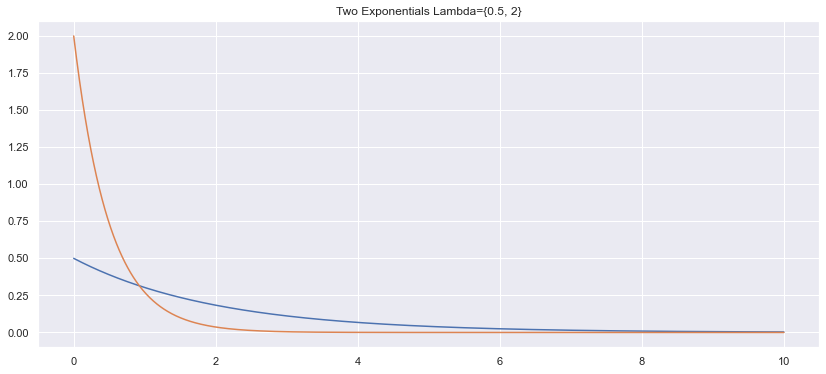

In [44]:
plt.figure(figsize=(14,6))

lambda1 = 0.5
lambda2 = 2

prob1 = lambda2/(lambda1 + lambda2) 
prob2 = lambda1/(lambda1+lambda2)

X_1 = expon(loc=0, scale=1/lambda1)
X_2 = expon(loc=0, scale=1/lambda2)

x1 = np.linspace(0, 10, 1000)
x2 = np.linspace(0, 10, 1000)

sns.lineplot(x=x1, y=X_1.pdf(x1))
sns.lineplot(x=x2, y=X_2.pdf(x2));
plt.title("Two Exponentials Lambda={0.5, 2}");


In [45]:
n = 100000 
(X_1.rvs(n) < X_2.rvs(n)).sum() / n


0.19964

In [46]:
prob = lambda1/(lambda1+lambda2)
prob

0.2

In [47]:
lambs_1 = [0.1, 2, 4, 5]
lambs_2 = [1, 3, 4.5, 6]


X_1s = []
X_2s = []

for i in range(len(lambs_1)):
    X_1s.append(expon(loc=0, scale=1/lambs_1[i]))
    X_2s.append(expon(loc=0, scale=1/lambs_2[i]))

In [48]:
n = 100000 
probs = []
for i in range(len(lambs_1)): 
    probs.append((X_1s[i].rvs(n) < X_2s[i].rvs(n)).sum() / n)

In [49]:
probs

[0.08835, 0.40055, 0.47154, 0.45237]

In [50]:
[lambs_1[i]/(lambs_2[i] + lambs_1[i]) for i in range(len(lambs_1))]

[0.09090909090909091, 0.4, 0.47058823529411764, 0.45454545454545453]

The empirical results are consistent with the formula derived above.

 [Difference of two exponentially distributed random variables](https://math.stackexchange.com/questions/115022/pdf-of-the-difference-of-two-exponentially-distributed-random-variables)


### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [51]:
# create matrix
T = np.array([0.4,0.2,0.1,0,0.1,0.2,
              0.2,0.4,0.2,0.1,0,0.1,
              0.1,0.2,0.4,0.2,0.1,0,
              0,0.1,0.2,0.4,0.2,0.1,
              0.1,0,0.1,0.2,0.4,0.2,
              0.2,0.1,0,0.1,0.2,0.4])
T = T.reshape((6,6))

state_space = [1,2,3,4,5,6]
init_dist = uniform(0,6).pdf(x=state_space)

In [52]:
def compute_trajectory(pi_zero, state_space, T, rolls, n):
    trajectories = []
    for traj in range(n):
        traj = []
        # initial dist for first roll
        pi = pi_zero
        # calculate trajectory
        for roll in range(rolls):
            result = np.random.choice(a=state_space, p = pi)
            # transition rule: pi_{n+1} = pi dot T
            pi = T[result-1]
            traj.append(result) # append probs for all the states
        
        trajectories.append(traj)
    return trajectories

def compute_trajectory_means(pi_zero, state_space, T, rolls, n):
    means = np.zeros(n)
    for traj in range(n):
        sum = 0
        # initial dist for first roll
        pi = pi_zero
        # calculate trajectory
        for roll in range(rolls):
            result = np.random.choice(a=state_space, p = pi)
            # transition rule: pi_{n+1} = pi dot T
            pi = T[result-1]
            # sum the transitional probabilities for all states
            sum += result
        # compute mean for each trajectory
        means[traj] = sum/rolls
    return means

In [53]:
random.seed(24)
# Construct 1000 trajectories, each of length 30.
trajectories_30 = compute_trajectory(pi_zero = init_dist, state_space=state_space, T=T, rolls = 30, n=1000)

In [54]:
# What do you expect the average value of all 30 numbers in a trajectory to be?
avg = np.linalg.matrix_power(T, 30).dot(init_dist).dot(state_space)
print("We expect the average value to be", avg)

We expect the average value to be 3.500000000000005


Text(0.5, 1.0, 'Average Value of Each Trajectory')

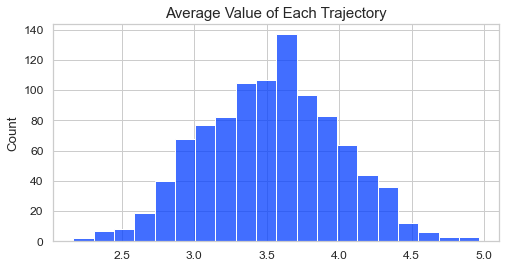

In [55]:
# Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins
means_30 =  compute_trajectory_means(pi_zero = init_dist, state_space=state_space, T=T, rolls = 30, n=1000)

sns.set_theme(style="whitegrid", palette='bright', font_scale=1.1)
plt.figure(figsize=(8,4))
sns.histplot(means_30, bins=20)
plt.title('Average Value of Each Trajectory', fontsize=15)

In [56]:
# What does the distribution look like? What are the empirical mean and the std?
print("Empirical mean:", means_30.mean())
print("Standard deviation:", means_30.std())

Empirical mean: 3.5274
Standard deviation: 0.4646388274778594


The distribution looks Normal and has an empirical mean of 3.50 and std of 0.47.

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [57]:
# Construct 1000 trajectories, each of length 500.
trajectories_500 =  compute_trajectory(pi_zero = init_dist, state_space=state_space, T=T, rolls = 500, n=1000)

In [58]:
# What do you expect the average value of all 500 numbers in a trajectory to be?
avg = np.linalg.matrix_power(T, 500).dot(init_dist).dot(state_space)
print("We expect the average value to be", avg)

We expect the average value to be 3.5000000000000924


The average value we expect does not change from when we only had 30 rolls for each trajectory.

Text(0.5, 1.0, 'Average Value of Each Trajectory')

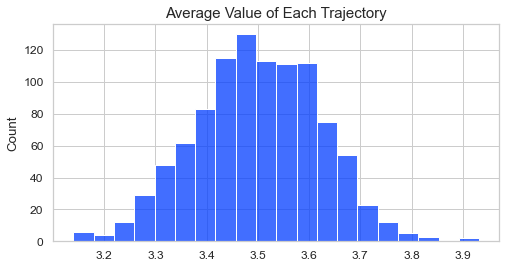

In [59]:
# Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
means_500 =  compute_trajectory_means(pi_zero = init_dist, state_space=state_space, T=T, rolls = 500, n=1000)

plt.figure(figsize=(8,4))
sns.histplot(means_500, bins=20)
plt.title('Average Value of Each Trajectory', fontsize=15)

In [60]:
# What does the distribution look like? What are the empirical mean and the std?
print("Empirical mean:", means_500.mean())
print("Standard deviation:", means_500.std())

Empirical mean: 3.5006559999999998
Standard deviation: 0.12199538378151856


The distribution looks similar (still looks Normal).
However, the standard deviation is smaller (because we increased the sample size), so the distribution is more narrow.

#### 4.C
Draw normal fit curves on your two histograms.

[Text(0.5, 1.0, '1000 Trajectories of Length 500'),
 Text(0, 0.5, ''),
 Text(0.5, 0, '')]

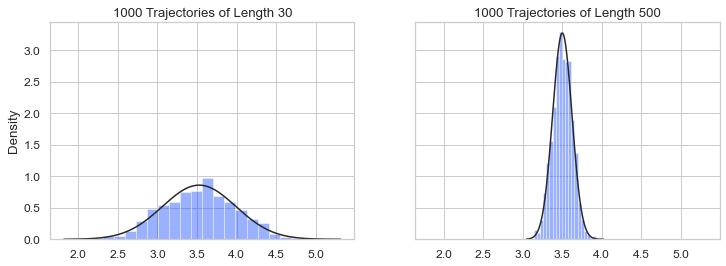

In [61]:
f, axs = plt.subplots(1,2,
                      figsize=(12,4),
                      sharey=True,
                    sharex=True)


sns.distplot(x=means_30, bins=20, kde=False, fit=norm, ax=axs[0])
sns.distplot(x=means_500, bins=20,  kde=False, fit=norm, ax=axs[1])
axs[0].set(ylabel= 'Density', xlabel='', title='1000 Trajectories of Length 30')
axs[1].set(title= '1000 Trajectories of Length 500', ylabel='', xlabel='')


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [62]:
def markov_covariance(pi_zero, state_space, T, n):
    
    cov = []
    
    for i in range(1, n):
        # for each iteration, to get the correct transition matrix raise T to power of i 
        T_new = np.linalg.matrix_power(T, i)
        exp_x0 = T.dot(init_dist).dot(state_space) # will be 3.5
        
        # matrix multiplication
        pi_xi = np.matmul(pi_zero, T_new)
        # stationary so exp_xi will be 3.5 for all i    
        exp_xi = T.dot(pi_xi).dot(state_space) 

        exp_x0xi = 0
        # calculate probability for each pair and sum
        for k1 in state_space:
            for k2 in state_space:
                exp_x0xi += (k1*k2*pi_zero[k1-1]*T_new[k1-1][k2-1])
        
        covariance = exp_x0xi - (exp_x0*exp_xi)
        cov.append(covariance)
        
    return cov

In [63]:
markov_covariance(pi_zero=init_dist, state_space=state_space, T=T, n=500)

[1.1166666666666671,
 0.5166666666666675,
 0.25266666666666815,
 0.12546666666666795,
 0.06258666666666457,
 0.031266666666668996,
 0.01562826666666517,
 0.007813146666666881,
 0.003906378666668431,
 0.001953150666672343,
 0.0009765676266688672,
 0.0004882822746665738,
 0.0002441408298672343,
 0.0001220703534681178,
 6.10351644443341e-05,
 3.0517579762801006e-05,
 1.525878938934966e-05,
 7.62939459342249e-06,
 3.814697276283141e-06,
 1.907348634588857e-06,
 9.536743181826068e-07,
 4.7683715642676816e-07,
 2.384185791015625e-07,
 1.1920928955078125e-07,
 5.9604641222676946e-08,
 2.9802320611338473e-08,
 1.4901161193847656e-08,
 7.450582373280668e-09,
 3.7252920748187535e-09,
 1.862645149230957e-09,
 9.313190219017997e-10,
 4.656612873077393e-10,
 2.3282886729703023e-10,
 1.1641532182693481e-10,
 5.820943727030681e-11,
 2.9102054099894303e-11,
 1.4553691585206252e-11,
 7.275957614183426e-12,
 3.6362024502523127e-12,
 1.8172130467064562e-12,
 9.07718344933528e-13,
 4.5297099404706387e-13,

We can see that as $i$ increases the covariance decreases and approaches zero.
This makes sense because as $i$ increases, its dependance on $X_0$ decreases.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

1)
We can see that $\pi$ at $X_0$ is uniform.
If we take T to an arbitrarily large power, 100, $\pi$ remains the same.
This is a stationary process.

In [64]:
print(T.dot(init_dist))
print("E_X0=", np.mean(T.dot(init_dist).dot(state_space)))

print(np.linalg.matrix_power(T, 100).dot(init_dist))
print("E_Xn=", np.linalg.matrix_power(T, 100).dot(init_dist).dot(state_space))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
E_X0= 3.5
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
E_Xn= 3.5000000000000187


2) We know that our $\pi_0$ = $\sigma$ (the stationary distribution).
We calculate the variance of $X_n$ for our case:

$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$

3) We know that the initial probability distribution is the stationary distribution.
Classic CLT requires independence (ie. each X is independent), but we know that our trajectories are very much dependent.
Instead of independence, we know two other properties about the stochastic process:
1) It satisfies the Markovian property
2) It is temporally homogeneous

4. Graphically show that the CLT holds for n=500 in our case.

We compute 500 trajectories each of n=500. As we can see in the graph, the distribution looks normal.

Text(0.5, 1.0, 'Average Value of Each Trajectory')

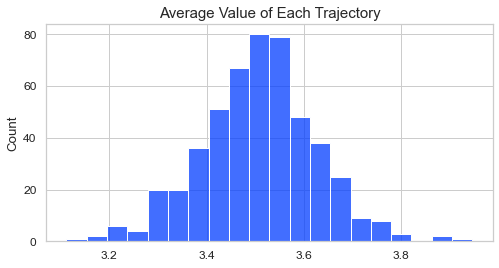

In [65]:
traject = compute_trajectory_means(pi_zero = init_dist, state_space=state_space, T=T, rolls = 500, n=500)
plt.figure(figsize=(8,4))
sns.histplot(traject, bins=20)
plt.title('Average Value of Each Trajectory', fontsize=15)

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

1)
$R$ is Binomial with parameters $p=0.5$ and $n=n$. First we recognize the possible values for $R$ are the natural numbers $0$ to $n$ and hence the distribution is discrete. We can ask ourselves what's the probability for R to be $0$ or $n$ (i.e. all $x_i$ to be smaller or larger than the median $m$), and note they are the same, namely $\frac{1}{2^n}$ because each element $x_i$ of the sample $\vec{x}(n)$ has probability $\frac{1}{2}$ of being below or above the median. Notice this probability stays the same for each element within the sample regardless of the value of R, which makes it feel binomial(n,p). Moreover you can define $k$ successes by ${x_1, ..., x_k} \le m$ leaving ${x_{k+1}, ..., x_n} > m$. 

$$P(R=k)= \binom{n}{k}p^k(1-p)^{n-k}$$

$$P(R=k)= \binom{n}{k}0.5^k\cdot0.5^{n-k}$$

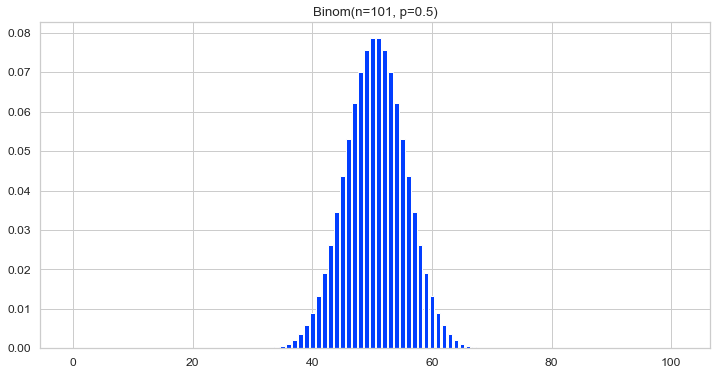

In [66]:
n = 101
p = 0.5
values = list(range(n + 1))
# dist = [binom.pmf(x, n, p) for x in values ]
dist = binom.pmf(values, n, p)
plt.figure(figsize=(12,6))
plt.bar(values, dist)
plt.title("Binom(n=101, p=0.5)");


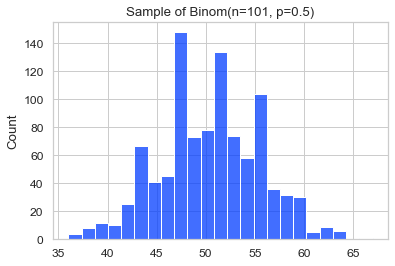

In [67]:
n = 101
p = 0.5
R = binom(n, 0.5)

sns.histplot(R.rvs(1000))
plt.title("Sample of Binom(n=101, p=0.5)");

2) Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

We can use the assumption that the set is sorted to say that $P(x_{\lambda (n)} \le m)$ and $P(x_{\lambda (n)+1} \le m)$ are actually cumulative probabilities (the condition is true for $x$ at $\lambda(n)$ and everything below it).
Therefore, we can look at R as a CDF, and $\lambda$ as the inverse of R, or the PPF.
The inverse of R will give us the index $i$ of the sample which has the desired properties, we know that:
$R^{-1}(p)$ gives the unique real number $x$ such that $F(x)=p$.
We can get the median by calculating $R^{-1}(0.5)$.
We also know that sum of the PMF of the binomial dist is equal to 1.

In [68]:
def nlambda(n):
    p = 0.5 # prob for the binomial dist
    
    for x in range(1,n):
        if ((1 - binom.cdf(x, n, p)) >= 0.95) and ((1 - binom.cdf(x+1, n, p)) < 0.95):
            return x

x = nlambda(101)

In [69]:
#test results:
n = 101
p = 0.5
x_ppf = binom.ppf(1-0.95, n, p)

print("The index is:", x)
print("Using the PPF, the index is:", x_ppf)
print(1 - binom.cdf(x, n, p))
print(1 - binom.cdf(x+1, n, p))

The index is: 41
Using the PPF, the index is: 42.0
0.963621496561238
0.9445408251696797


Therefore, at an index of 41 we get the desired properties. We also confirm this by calculating the PPF and seeing that the resulting index is indeed very close.